In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Customer-Churn.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 #replace the blank values to 0 as customer tenure is 0 months & convert the data type of TotalCharges column from Object to Float

In [4]:
data["TotalCharges"] = data["TotalCharges"].replace(" ", "0")
data["TotalCharges"] = data["TotalCharges"].astype("float")

In [5]:
data.isnull().sum().sum()

np.int64(0)

In [6]:
data.isna().sum().sum()

np.int64(0)

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data["customerID"].duplicated().sum()

np.int64(0)

#convert data type of SeniorCitizen from int to object as we have to convert the value from 0/1 to Yes/No

In [9]:
data["SeniorCitizen"] = data["SeniorCitizen"].astype("object")

#convert value of SeniorCitizen column from 0/1 to Yes/No for better understanding the data

In [10]:
data["SeniorCitizen"] = data["SeniorCitizen"].replace(0, "No")
data["SeniorCitizen"] = data["SeniorCitizen"].replace(1, "Yes")

In [11]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


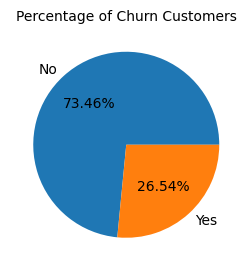

In [39]:
plt.figure(figsize = (3,4))
gb = data.groupby("Churn").agg({"Churn" : "count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churn Customers", fontsize = 10 )
plt.show()


#from the above pie chart we can see our 26.54% customers are chured out, now let's find the reason behind it

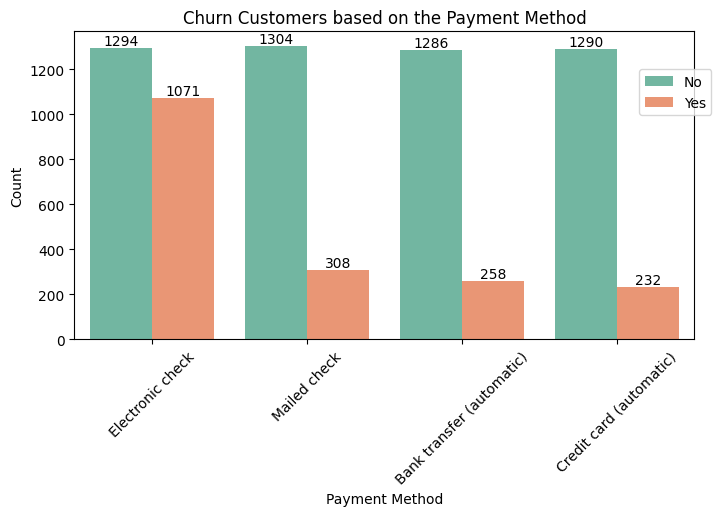

In [32]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x='PaymentMethod', data = data, hue = 'Churn', palette = "Set2")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Churn Customers based on the Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor = (0.9, 0.9))
plt.show()

#Churn Customers rate if high when the Payment Method is Electronic Check

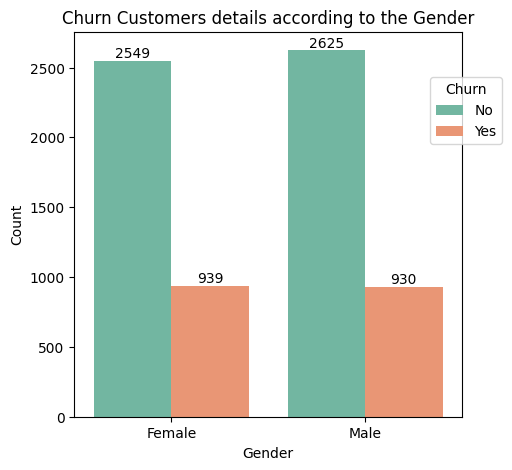

In [78]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "gender", data = data, hue = "Churn", palette = "Set2")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn Customers details according to the Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title = "Churn", bbox_to_anchor = (0.9,0.9))
plt.show()

#From this chart we cannot conclude anything, because the churn customer are almost same either the customer is male or female

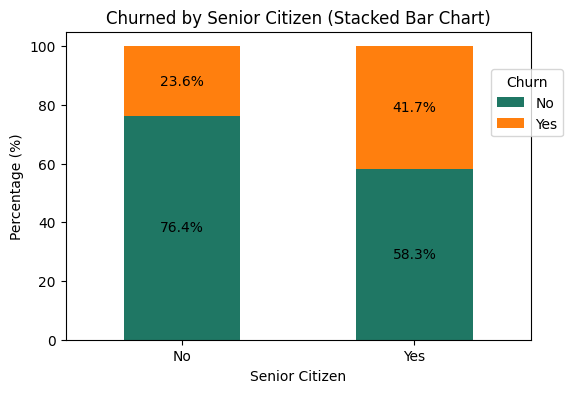

In [60]:
total_counts = data.groupby('SeniorCitizen')['Churn'].value_counts(normalize = True).unstack() * 100

# plot
fig, ax = plt.subplots(figsize = (6,4)) 

# Plot the bars
total_counts.plot(kind = 'bar', stacked = True, ax = ax, color=['#1f7764' , '#ff7f0e']) # customize colors if desired

# Add percentage label on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')

plt.title("Churned by Senior Citizen (Stacked Bar Chart)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")
plt.xticks(rotation = 0)
plt.legend(title = "Churn", bbox_to_anchor = (0.9, 0.9))

#Churned Customer based on Senior Citizen and we can see that if the person is senior citizen then the churn rate is high

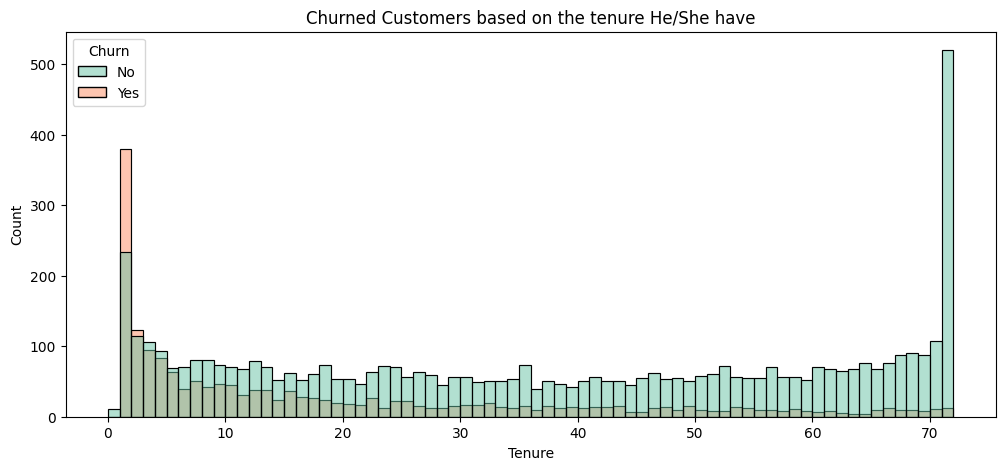

In [64]:
plt.figure(figsize = (12,5))
sns.histplot(x = 'tenure', data = data, bins = 72, hue = 'Churn', palette = "Set2")
plt.title("Churned Customers based on the tenure He/She have")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.show()

#We can see in the above chart if the tenure is 0 or 1 month and the churn rate is high and gradually it decreases

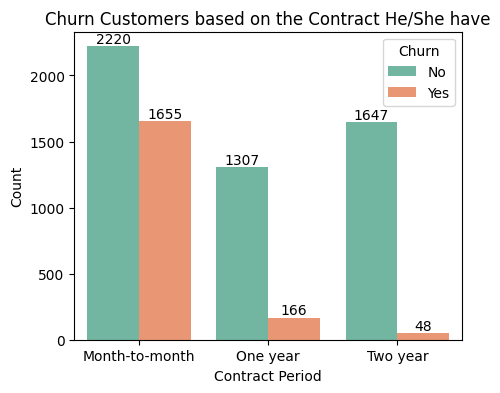

In [74]:
plt.figure(figsize = (5, 4))
ax = sns.countplot(x = "Contract", data = data, hue = "Churn", palette = 'Set2')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Churn Customers based on the Contract He/She have")
plt.xlabel("Contract Period")
plt.ylabel("Count")
plt.show()

#In the above chart we can see if the contract period of the customer is monthly then the churn rate is high

In [75]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

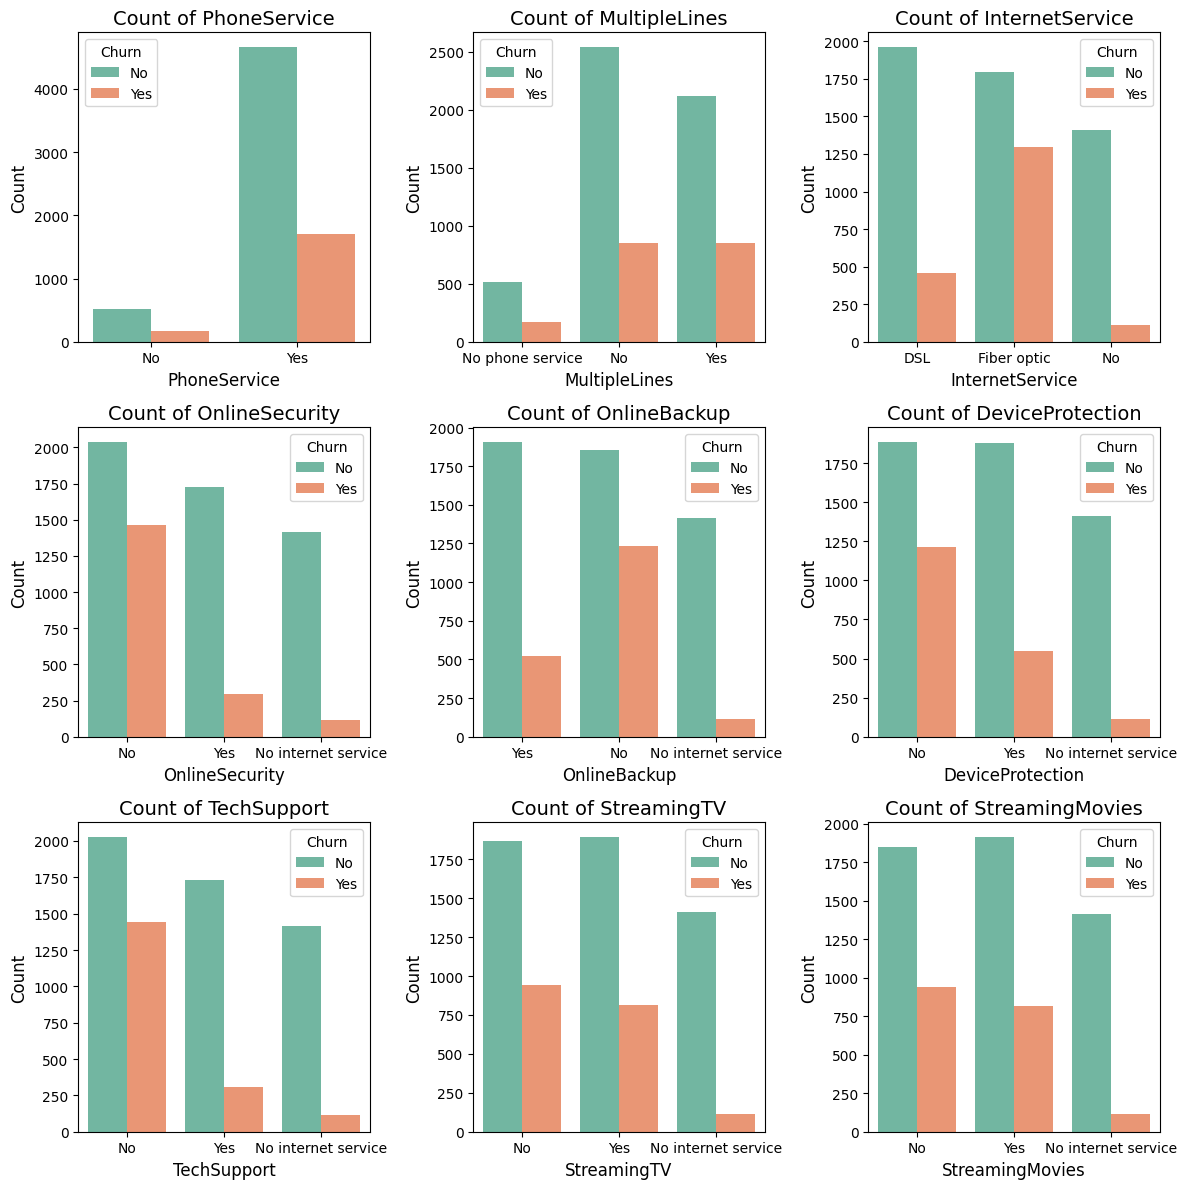

In [76]:
# List of columns to plot
columns_to_plot = [
    'PhoneService', 'MultipleLines', 'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# length of the columns list
num_plots = len(columns_to_plot)

# Create subplots with appropriate size
fig, axes = plt.subplots(nrows=(num_plots // 3) , ncols=3, figsize=(12, (num_plots // 3) * 4))
axes = axes.flatten()  # Flatten axes array to make indexing easier

# Loop over each column and plot the countplot
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=data, x=column, ax=axes[i], hue = 'Churn', palette = 'Set2')  # Choose a color palette
    axes[i].set_title(f'Count of {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#The majority of the customers who do not churn tend to have services like PhoneServices, InternetServices(Particulary DSL) and OnlineSecurity Enabled. For Services like OnlineBackup, TechSupport, and StreamingTV, churn rate are noticeably higher when these services are not user or are unavailable